# Übung 8: Clustering

##  Aufgabe 1: K-Means

Clustering ist eine Methode um mittles Unsupervised Learning zusammen gehörende Daten zu finden und kann für verschiedene Daten angewendet werden.

In dieser Übung möchten wir versuchen, damit ähnlichfarbige Objekte/Regionen in Bildern zu erkennen.

In [54]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 400

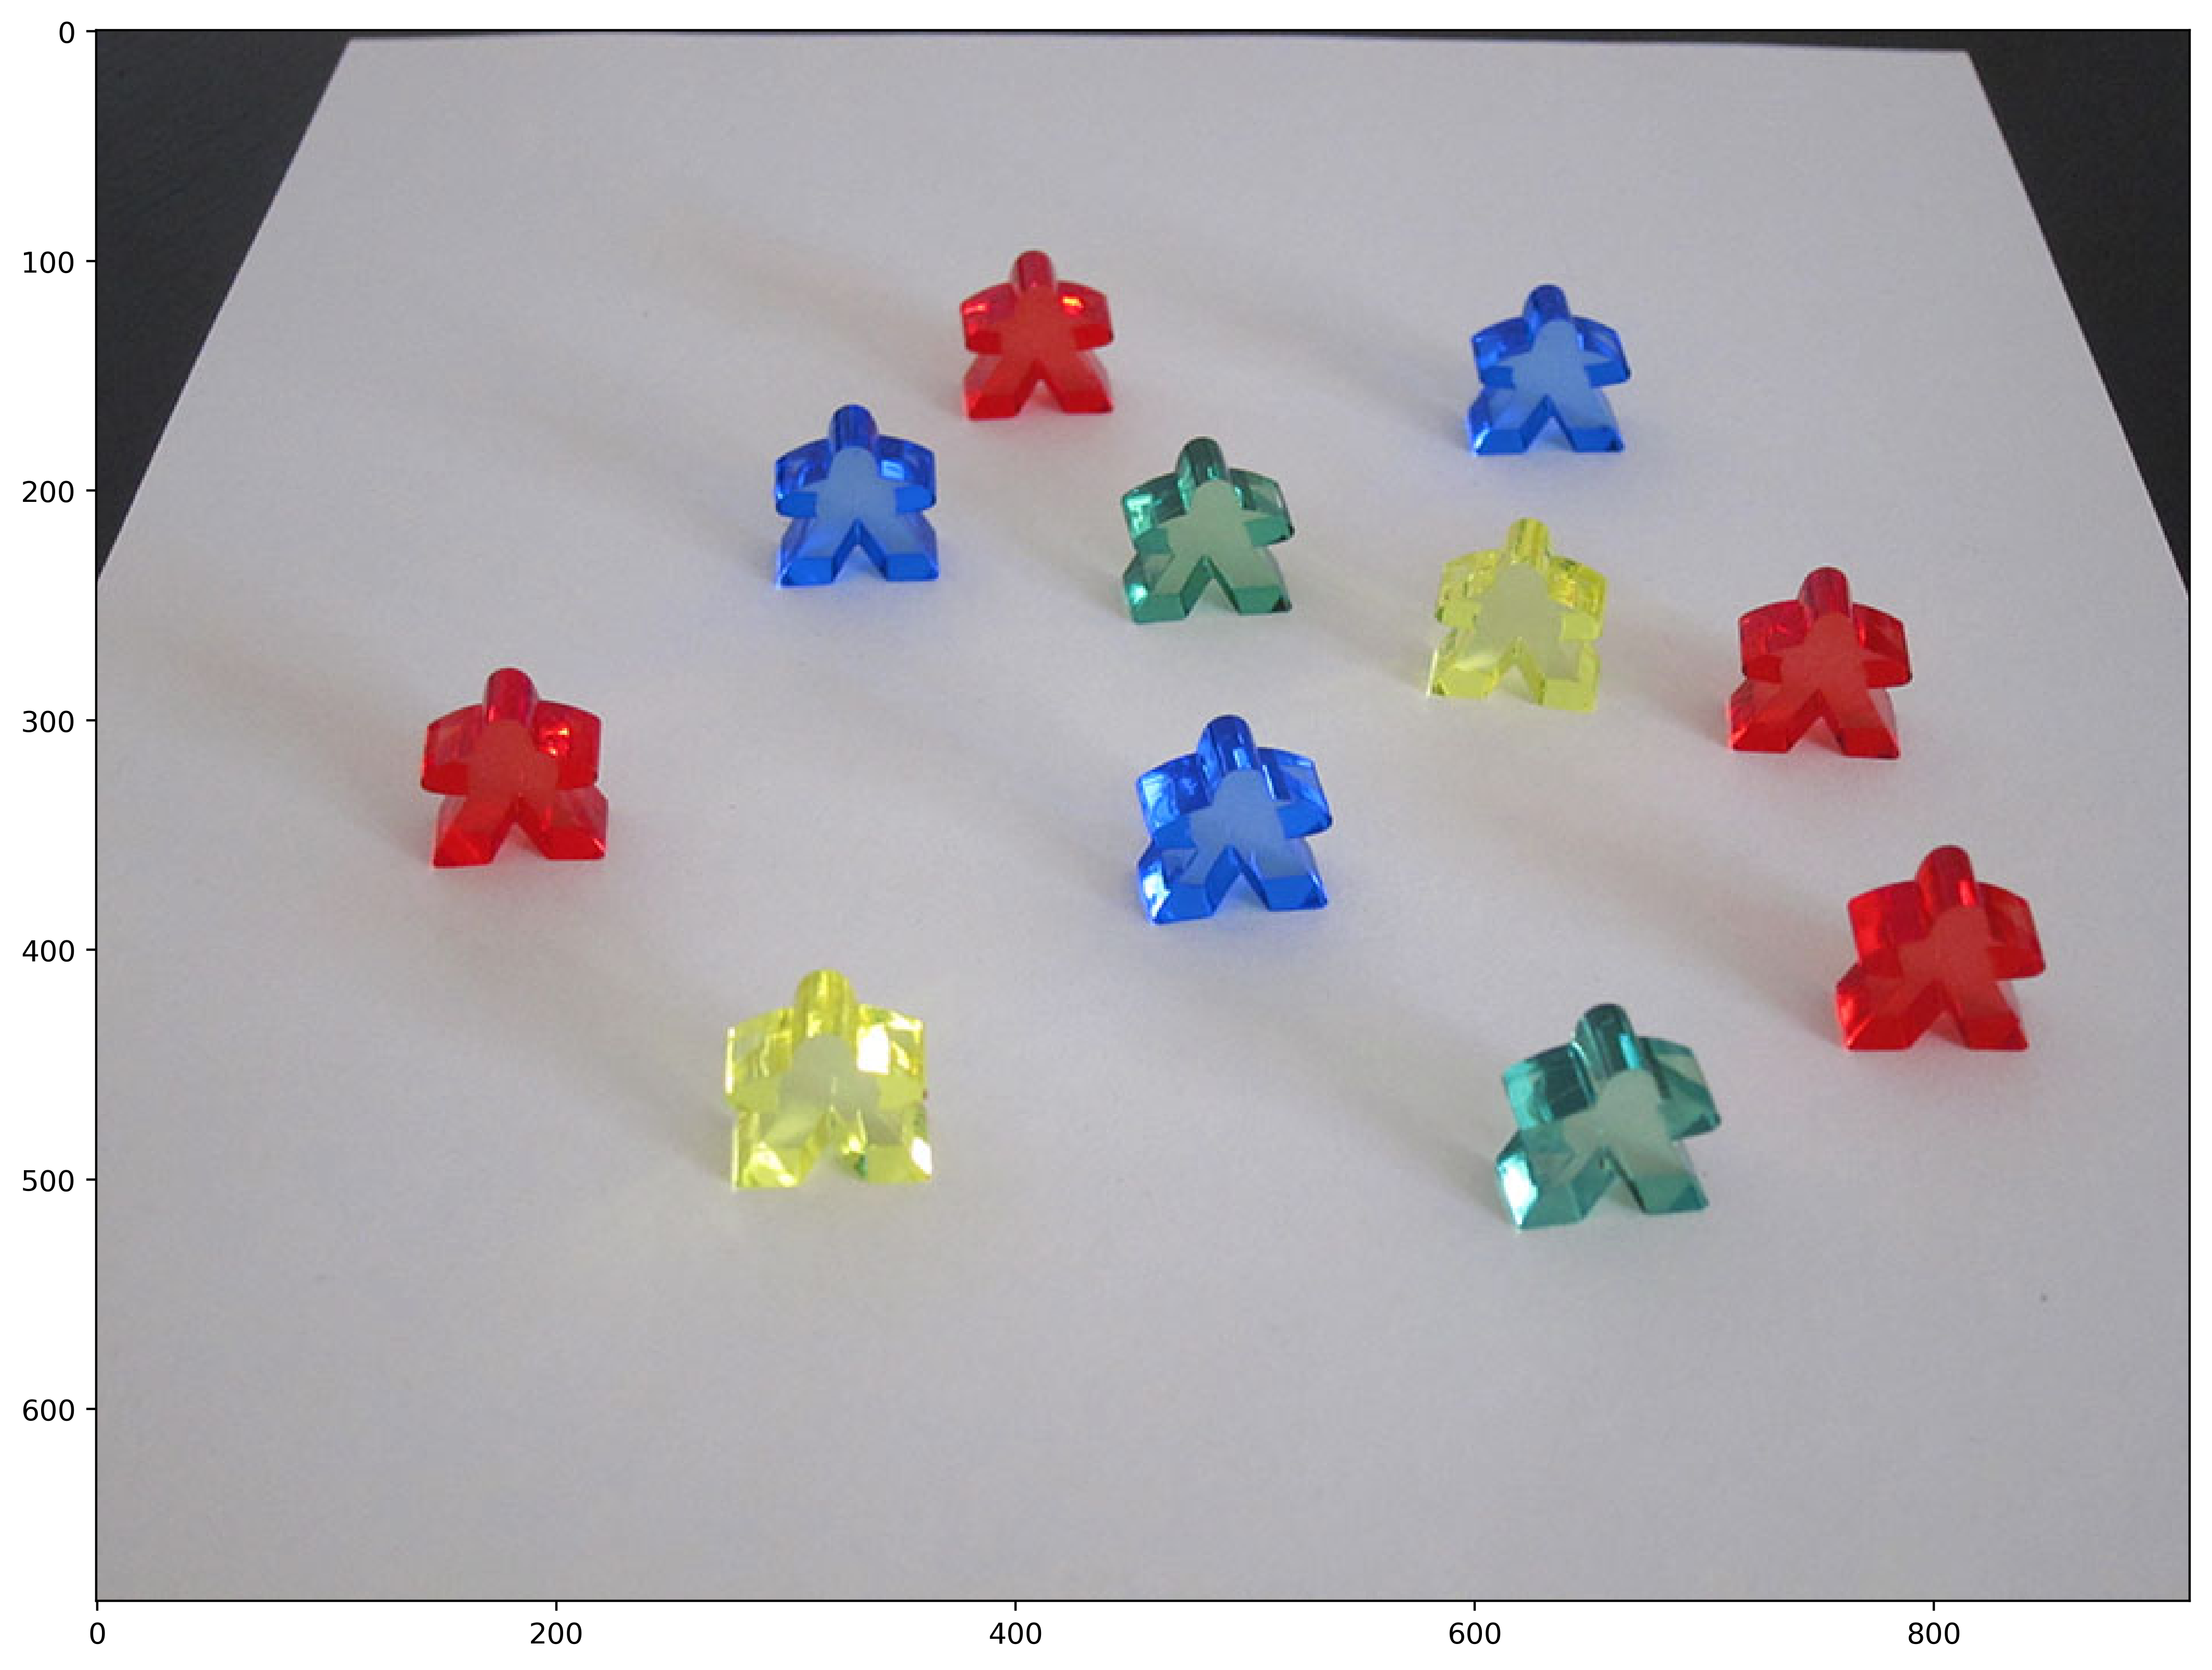

In [55]:
image  = cv2.imread('images/figures.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.show()

### Clustering

Auf dem obigen Bild sollen die verschiedenen Figuren anhand ihrer Farbe detektiert werden. Dazu soll Clustering verwendet werden. OpenCV enthält dafür eine Implementation von k-Means. Als Input wird dabei ein (1D-) Array von Farbwerten verwendet, sie müssen das Bild also von einem 2D Array von RGB in ein 1D Array von RGB umwandeln. Dazu kann `reshape` (numpy) verwendet werden.


In [56]:
data = image.reshape((-1,3))
data_float = np.float32(data)
print(data_float.shape)

(623808, 3)


Wenden Sie nun die Funktion `cv2.kmeans(...)` an. Als TermCriteria können sie die folgende Struktur benutzen. Wenn Sie keine Centren initialisieren wollen, können sie als Labels `None` übergeben.

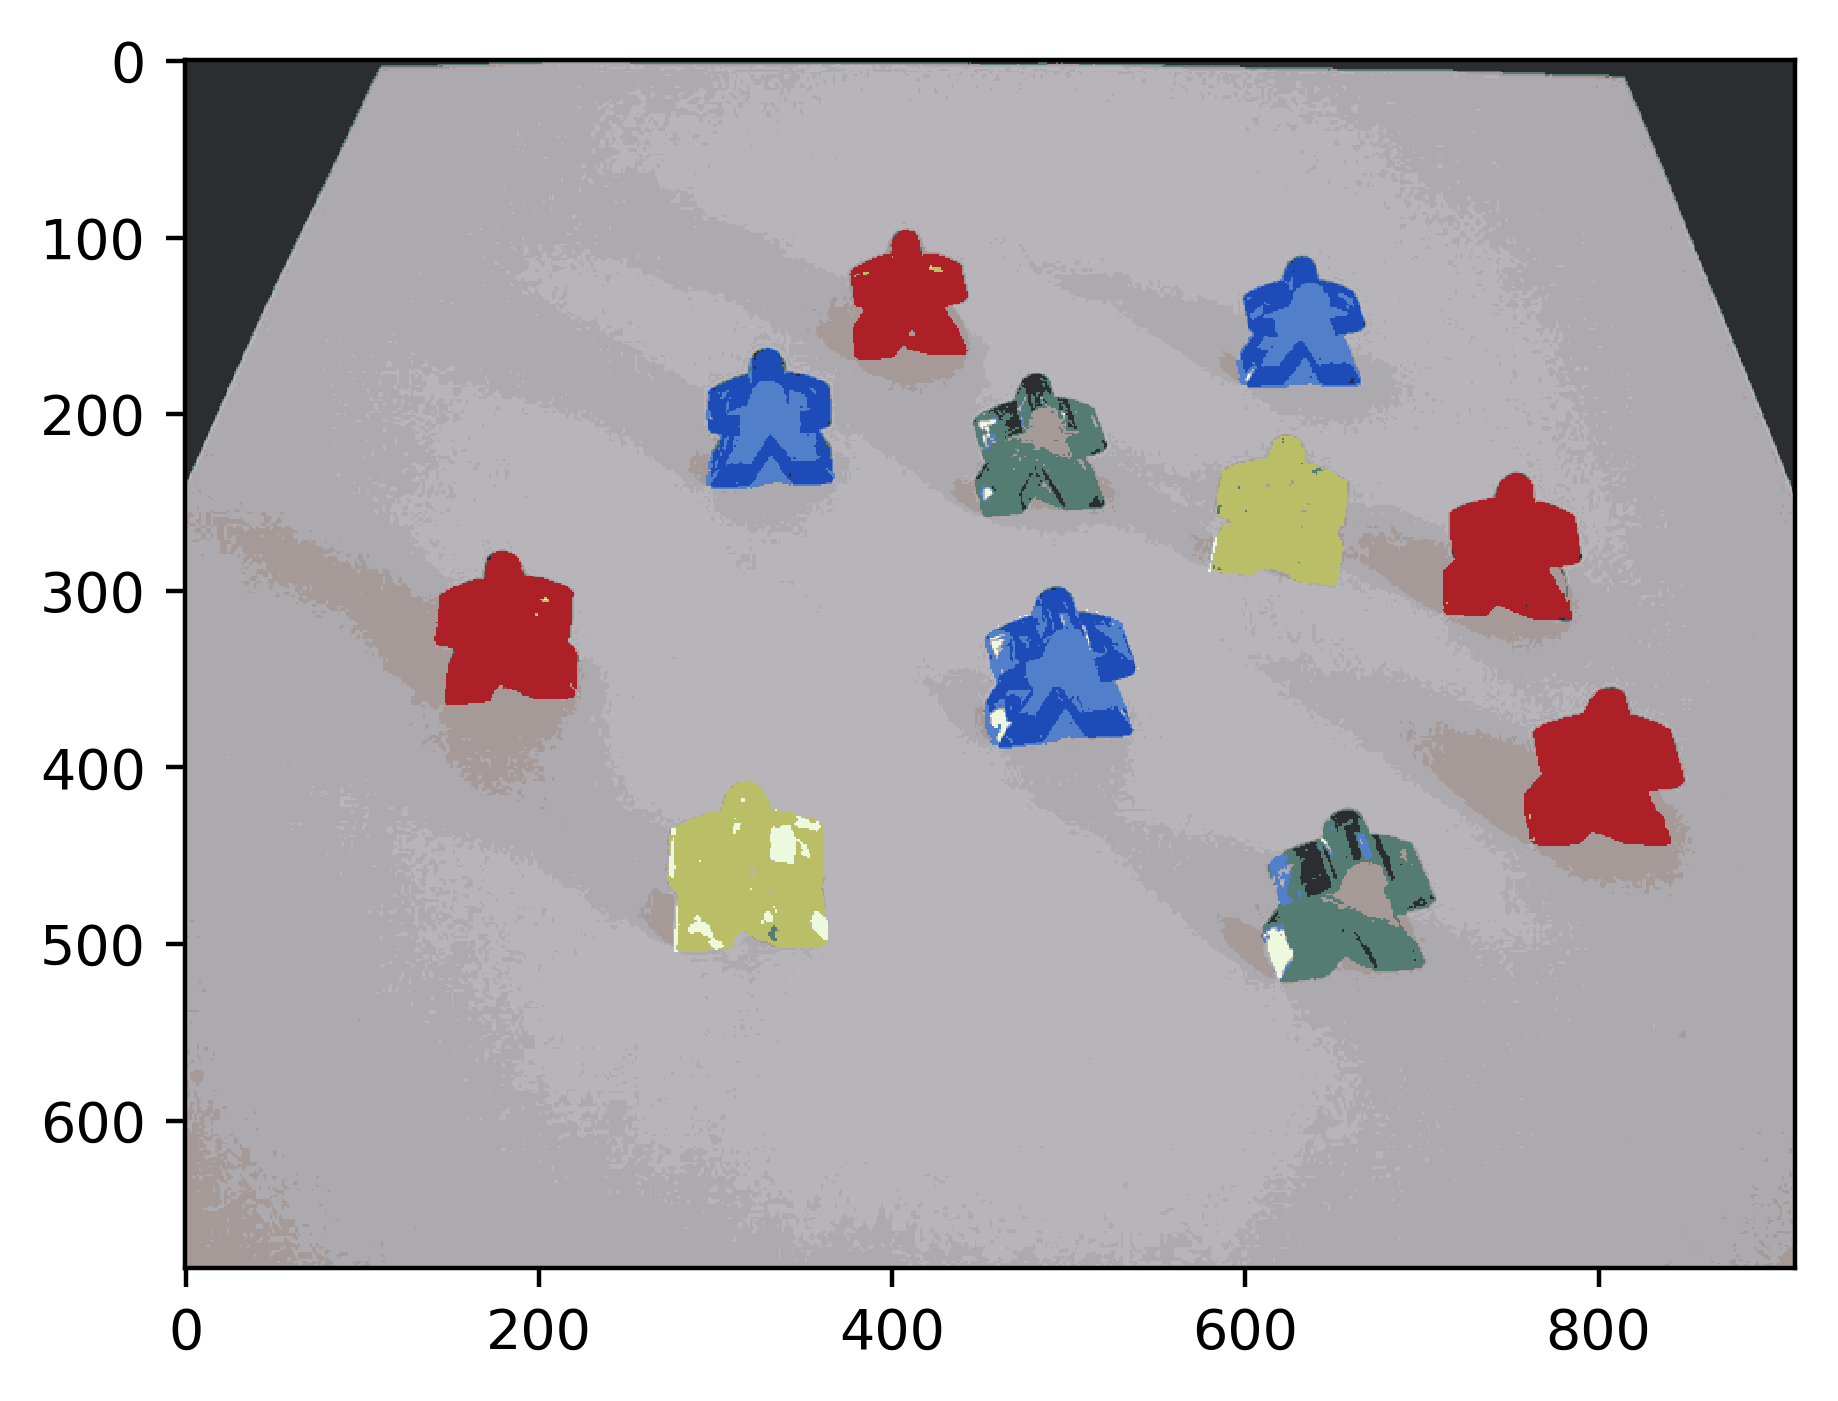

In [60]:
criteria = (cv2.TERM_CRITERIA_EPS, 1000, 0.001)
ret,label,center=cv2.kmeans(data_float,10,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image.shape))

plt.imshow(res2)
plt.show()

Stellen Sie das Resultat wieder als Bild dar. Dazu können Sie zum Beispiel die Cluster Centers verwenden und das Label Bild wieder auf das 2 dimensionale Bildraster umformen.

Alternativ können Sie zur Überlagerung von Bildern und Label auch die Funktion ```skimage.color.label2rgb``` verwenden.

Probieren Sie verschiedene Werte von K. Wie erreichen Sie die besten Resultate. Wie überprüfen Sie die Qualität der Resultate?

### Aufgabe 2: Mean Shift

OpenCV enthält auch eine Funktion um Mean Shift durchzuführen: `pyrMeanShiftFiltering`. Allerdings kann diese nur direkt auf Bildern angewendet werden und nicht auf allgemeine Daten. 

Wenden Sie die Funktion auf das ursprüngliche Bild an und interpretieren Sie das Resultat.

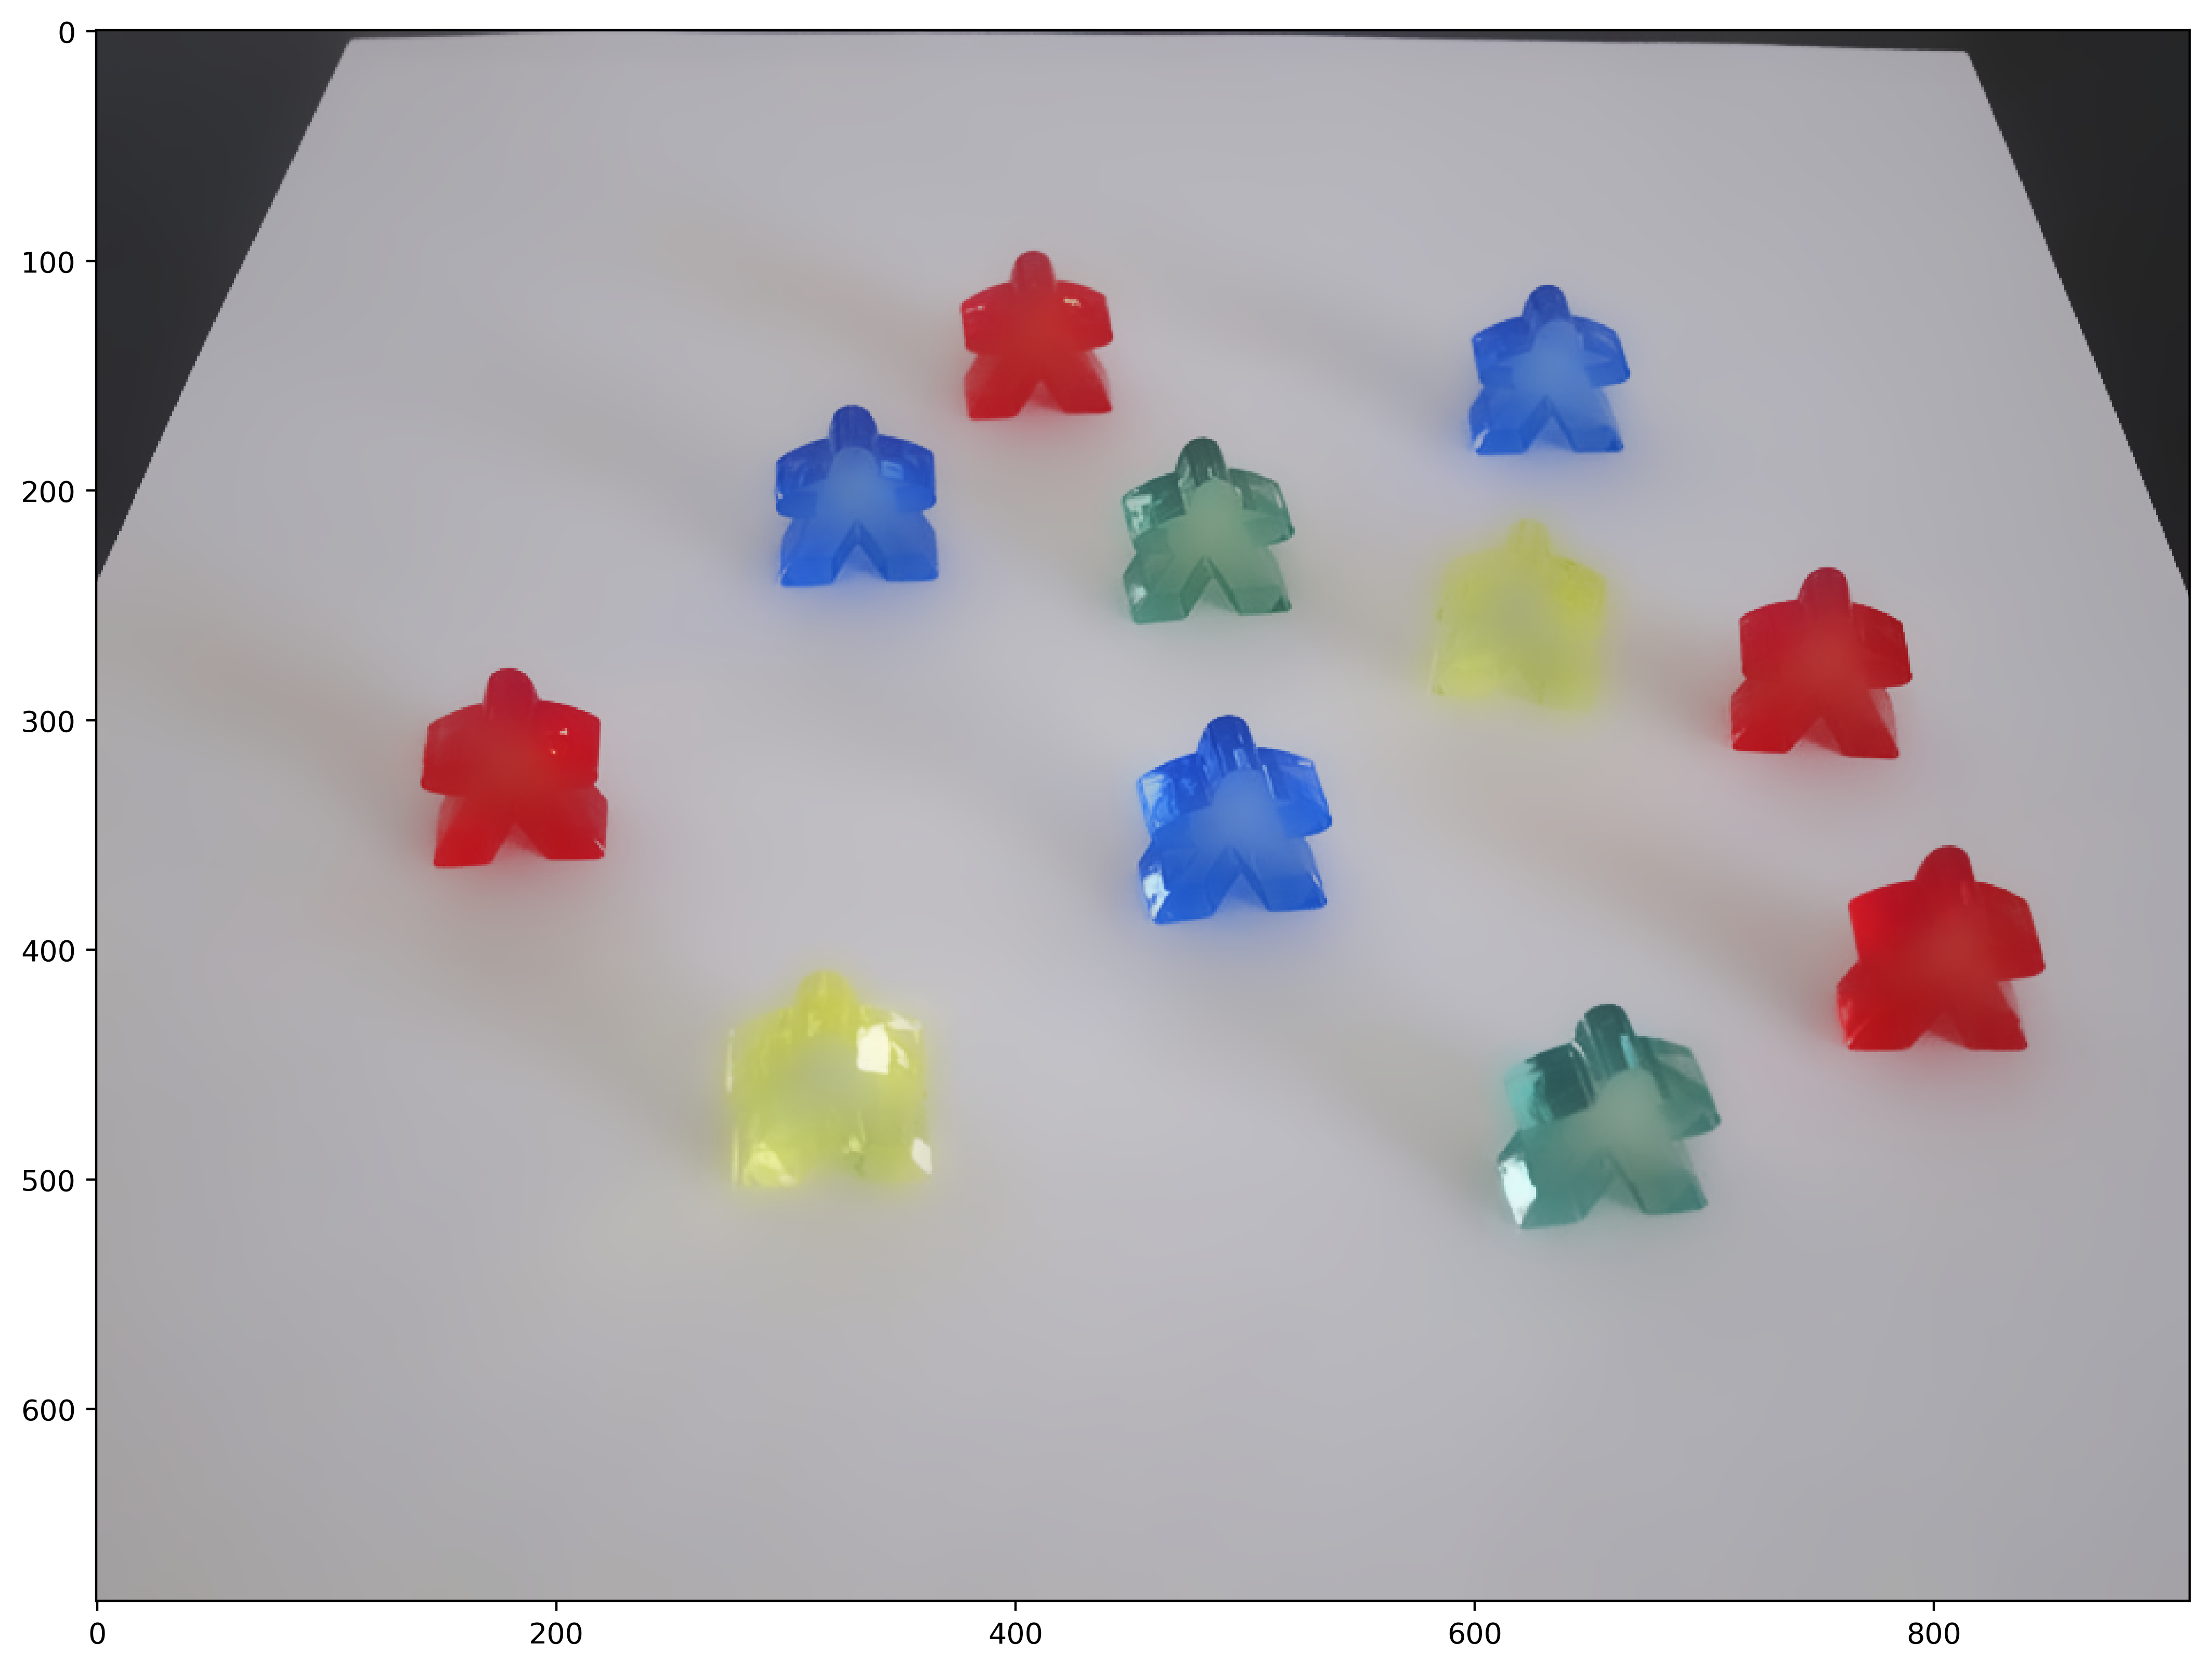

In [61]:
image  = cv2.imread('images/figures.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imagef = cv2.bilateralFilter(image,30, 110, 200)

plt.figure(figsize=(20,10))
plt.imshow(imagef)
plt.show()

## Aufgabe 3: Superpixel und GraphCut

Die Skimage Bibliothek enthält Graph Cut Algorithmen um ein Bild zu segmentieren. Dazu sollte es allerdings besser zuerst in Superpixels unterteilt werden, und diese dann mittels Graphcut weiter segmentiert werden.

Eine Implementation des Superpixels Clustering ist *slic*, das sowohl im Pixel- wie auch im Farbraum clustered:

http://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic

Segmentieren Sie das Bild in Superpixel, die Anzahl Regionen kann dabei als Parameter angegeben werden.


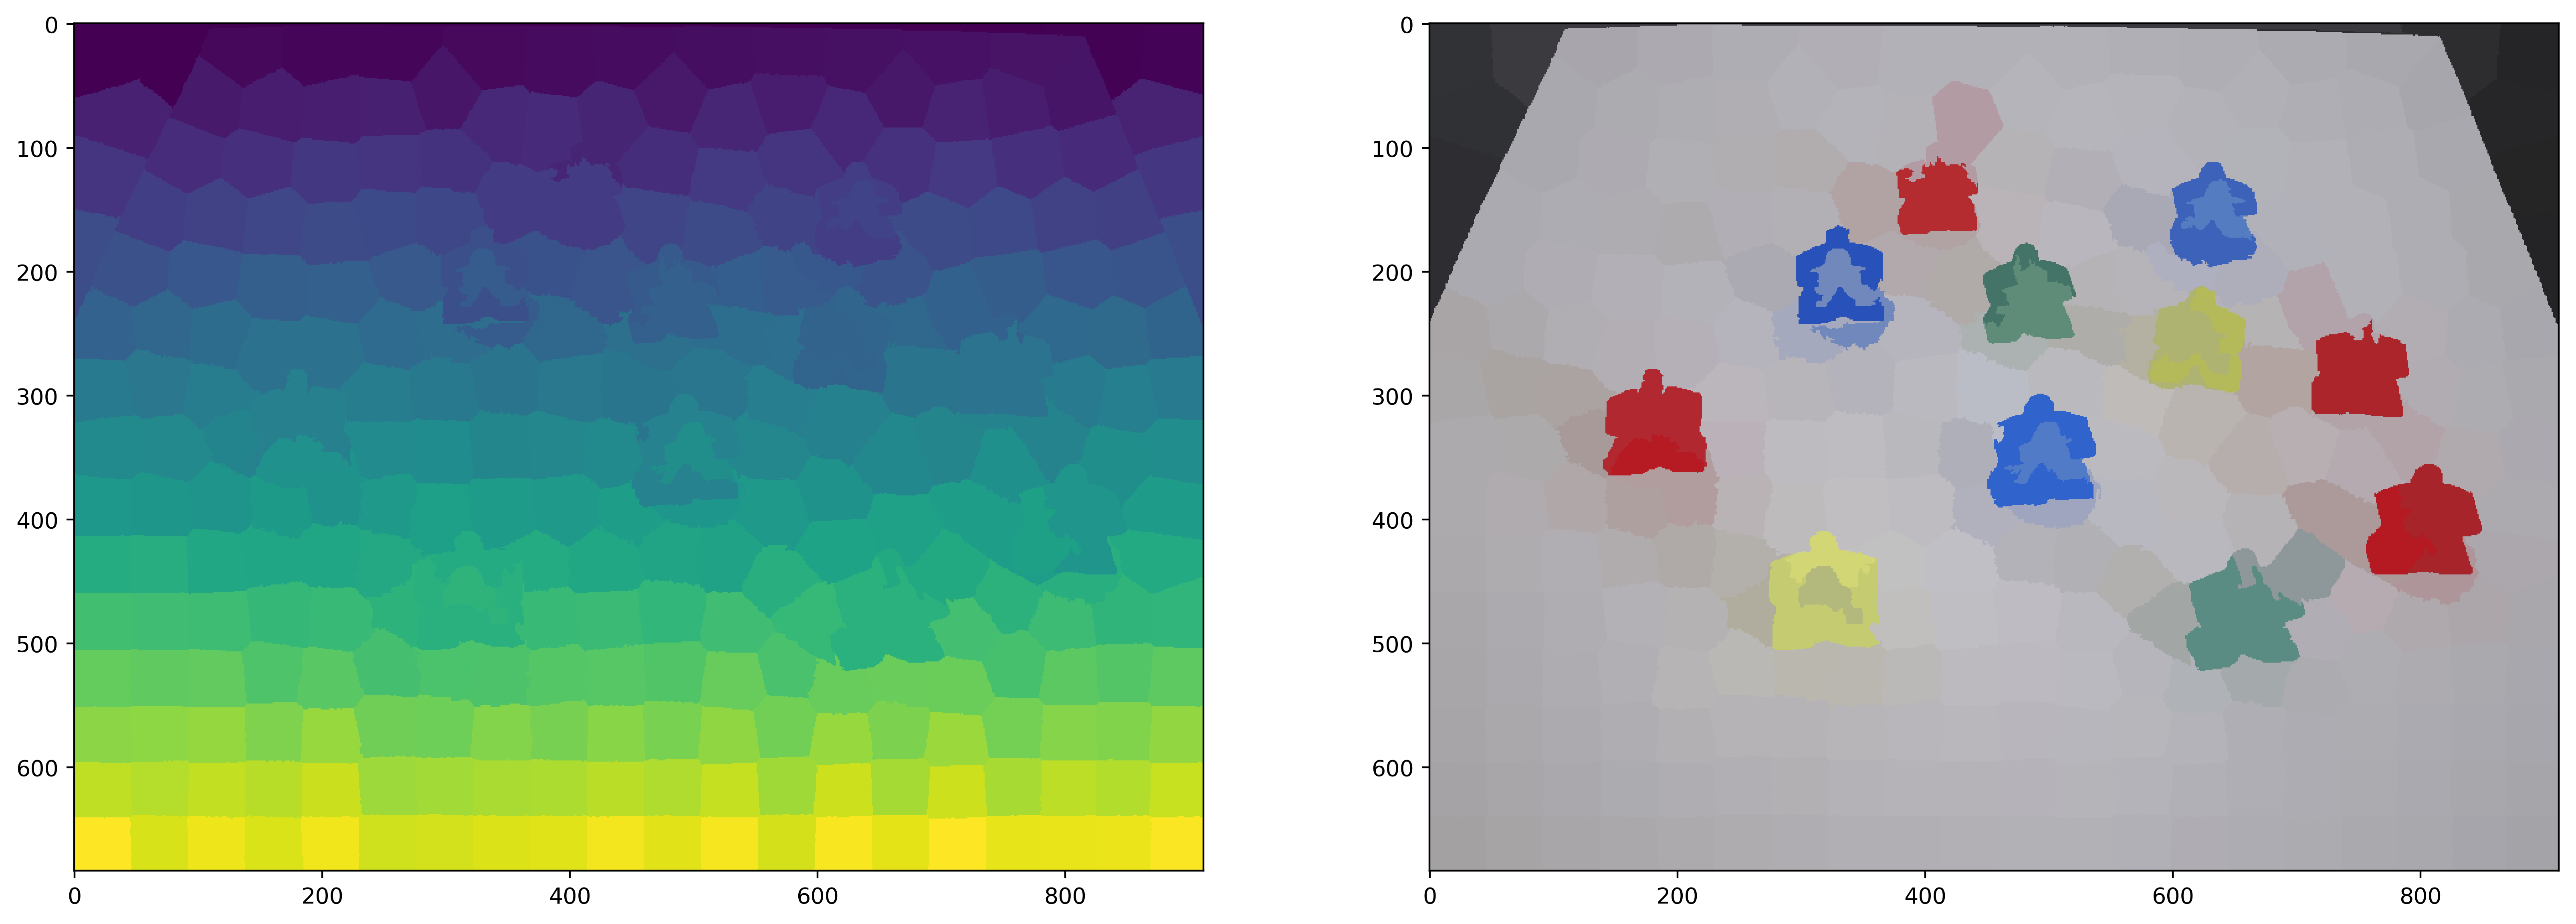

In [62]:
from skimage.segmentation import slic
from skimage import color
from skimage.future import graph

image = cv2.imread('images/figures.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

labels = slic(image, n_segments=300, compactness=10)
labels_rgb = color.label2rgb(labels, image, kind='avg')

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(labels)
plt.subplot(1, 2, 2)
plt.imshow(labels_rgb)
plt.show()

Für die weitere Verarbeitung, muss zuerst der *Region Adjacency Graph* berechnet werden:

http://scikit-image.org/docs/dev/api/skimage.future.graph.html#skimage.future.graph.rag_mean_color

auf diesem kann dann der Graphcut Algorithmus durchgeführt werden.

http://scikit-image.org/docs/dev/api/skimage.future.graph.html#skimage.future.graph.cut_normalized

Verwenden Sie beides und stellen Sie das Resultat dar.

In [63]:
rag = graph.rag_mean_color(image, labels, mode='similarity')
new_labels = graph.cut_normalized(labels, rag)
new_labels_rgb = color.label2rgb(new_labels, image, kind='avg')

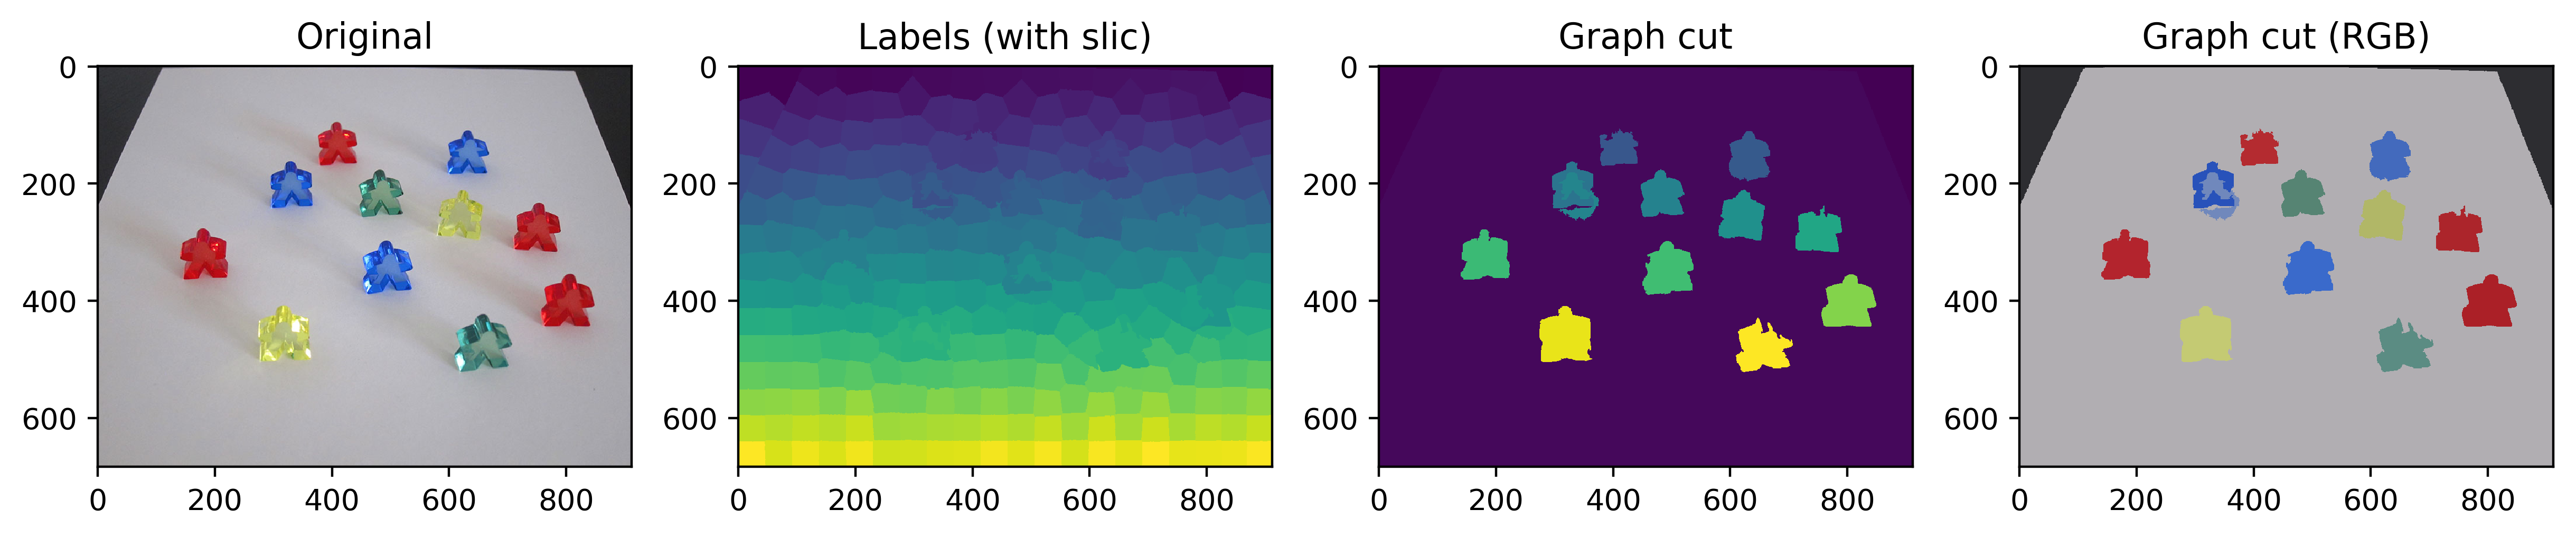

In [64]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(image)
plt.subplot(1, 4, 2)
plt.title("Labels (with slic)")
plt.imshow(labels)
plt.subplot(1, 4, 3)
plt.title("Graph cut")
plt.imshow(new_labels)
plt.subplot(1, 4, 4)
plt.title("Graph cut (RGB)")
plt.imshow(new_labels_rgb)
plt.show()